# <div class="markdown-google-sans">
  <h1>OpenCV 기초</h1>

</div>

OpenCV(Open Source Computer Vision) 을 활용하여 영상데이터를 표현하고 변환하고 분석하는 예제입니다.

In [ ]:
!pwd


/content


# 연습 1: 사각형 그리기

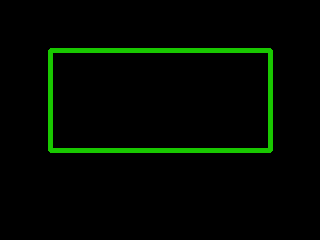

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('black.png', cv2.IMREAD_COLOR)
img = cv2.rectangle(img, (50,50), (270,150), (0,200,25), 3)
cv2_imshow(img)
cv2.waitKey(1)

# 연습 2: 칼라 이미지 파일을 읽어 화면에 표시

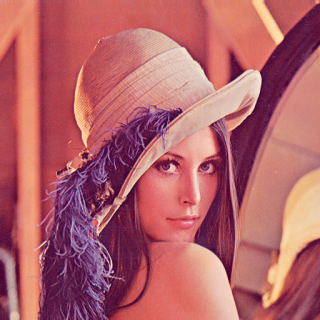

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('girl.png', cv2.IMREAD_COLOR)
cv2_imshow(img)

# 연습 3: 칼라 이미지를 흑백으로 읽어서 화면에 표시

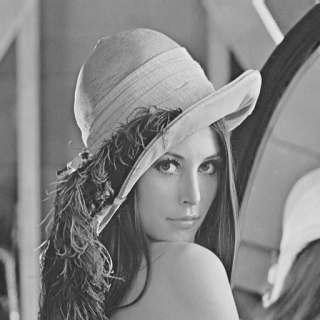

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('girl.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# 연습 4: 컬러 이미지를 흑백 이미지로 변환

original


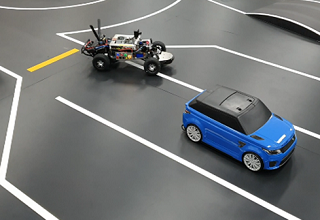

gray


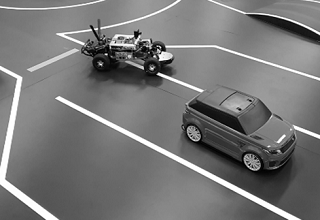

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('cars.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("original"); cv2_imshow(img)
print("gray");     cv2_imshow(gray)

# 연습 5: 이미지의 노이즈를 제거

gray


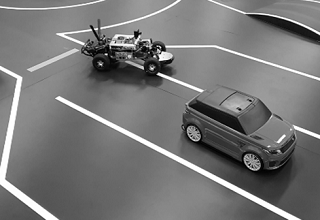

blur


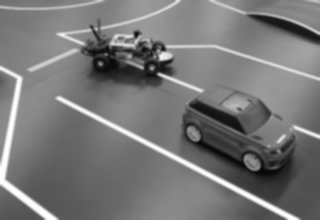

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('cars.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
print("gray"); cv2_imshow(gray)
print("blur"); cv2_imshow(blur)

# 연습 6: 이미지에서 흰 점 (하나!) 찾아내기

The image dimension is 320 x 240
White pixel position is 72 99


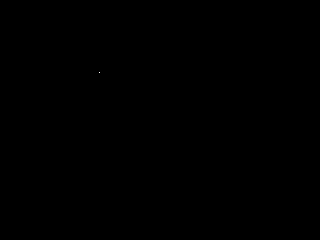

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('spot.png', cv2.IMREAD_GRAYSCALE)
h = img.shape[0]
w = img.shape[1]
print("The image dimension is %d x %d" % (w, h))

for i in range(0, h - 1):
    for j in range(0, w - 1):
        if img[i, j] == 255:
            print("White pixel position is",i, j)

cv2_imshow(img)

# 연습 7: 관심 영역 (ROI) 설정

ROI image


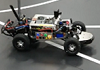

original


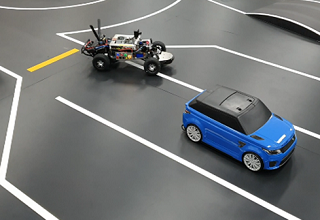

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('cars.png')
print("ROI image"); cv2_imshow(img[20:90, 80:180])
print("original");  cv2_imshow(img)

# 연습 8: HSV 필터링으로 차선 추출

original


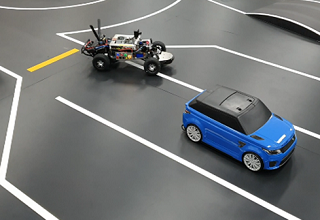

inRange


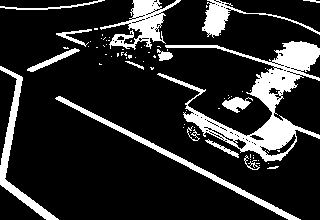

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('cars.png')
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
upper_white = np.array([255, 255, 255])
lower_white = np.array([  0,   0, 150])
binary_img = cv2.inRange(hsv_image, lower_white, upper_white)

print("original"); cv2_imshow(img)
print("inRange");  cv2_imshow(binary_img)

# 연습 9: 명도 값을 이용하여 차선 검출하기

original


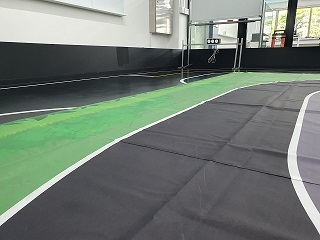

inRange


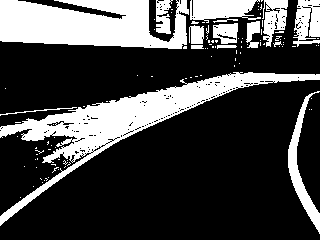

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('track08.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
upper_white = np.array([255, 255, 255])
lower_white = np.array([  0,   0, 180])
binary_img = cv2.inRange(hsv_image, lower_white, upper_white)
print("original"); cv2_imshow(image)
print("inRange");  cv2_imshow(binary_img)

# 연습 10: 사각형 안의 흰색 점 개수 찾기

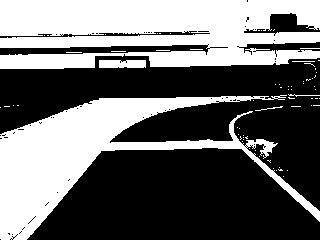

Lane 10
Lane 20
Lane 30
Lane 40
Lane 50
Lane 60
Lane 280


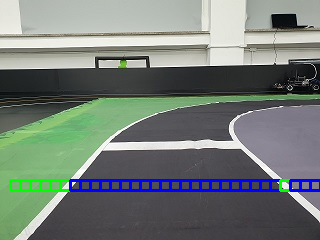

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('track01.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

upper_white = np.array([255, 255, 255])
lower_white = np.array([0, 0, 150])

img = cv2.inRange(hsv, lower_white, upper_white)
cv2_imshow(img)

xx= 10
while True:
    area = img[180:190, xx:xx+10]
    if cv2.countNonZero(area) > 50:
        image = cv2.rectangle(image,(xx,180),(xx+10,190),(0,255,0),2)
        print("Lane", xx)
    else:
        image = cv2.rectangle(image,(xx,180),(xx+10,190),(255,0,0),2)
    xx = xx+10
    if xx > 360:
        break

cv2_imshow(image)

#연습 11: Canny 함수로 외곽선 추출하기

original


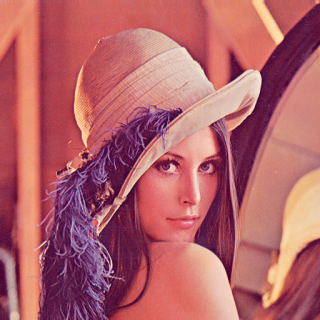

Canny edge


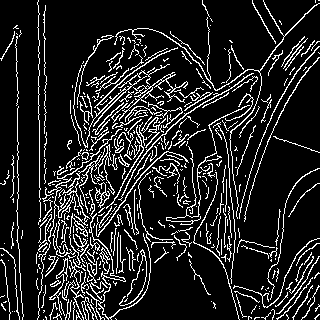

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('girl.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edge = cv2.Canny(blur, 20, 40)

print("original");   cv2_imshow(img)
print("Canny edge"); cv2_imshow(edge)

# 연습 12: 외곽선 추출로 차선 찾기

original


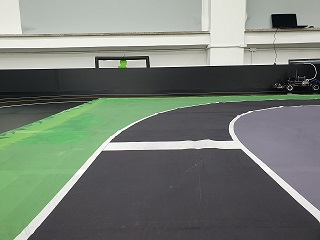

canny edge


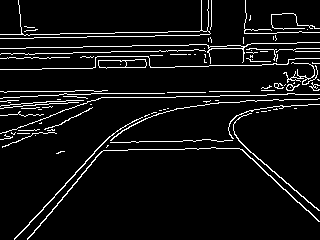

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('track01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edge = cv2.Canny(blur, 20, 40)

print("original");   cv2_imshow(img)
print("canny edge"); cv2_imshow(edge)

#정지선 찾기

정지선은 옆으로 길쭉한 사각형입니다. 차도위에 있으며, 종종 정지선 뒤에 횡단보도가 있고 흰색 또는 노란색입니다.

정지선을 감지하기 위해서는 정지선 색을 찾아야하고 도로 위에 있는 너비가 긴 직사각형을 찾아야 합니다.
아래는 영상처리를 통해서 정지선을 찾아내는 예제입니다.

#연습 1: HSV 색상모델을 이용한 정지선 찾기

Original Image


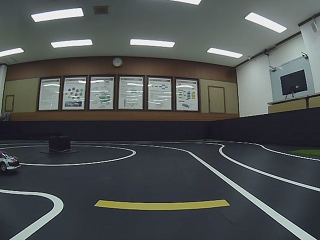

ROI Image


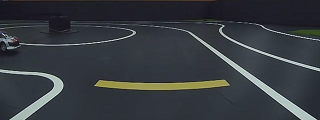

Stopline Check Image


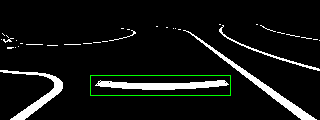

Stopline Found...! -  825


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('stopline.png', cv2.IMREAD_UNCHANGED)

print("Original Image")
cv2_imshow(image)

# image(원본 이미지)의 특정영역(ROI Area)을 잘라내기
roi_img = image[120:240, 0:320]
print("ROI Image")
cv2_imshow(roi_img)

# HSV 포맷으로 변환하고 V 채널에 대해 범위를 정해서 흑백이진화 이미지로 변환
hsv_image = cv2. cvtColor(roi_img, cv2.COLOR_BGR2HSV)
upper_white = np.array([255, 255, 255])
lower_white = np.array([0, 0, 150])
binary_img = cv2.inRange(hsv_image, lower_white, upper_white)

# 흑백 이진화 이미지에서 특정영역을 잘라내서 정지선 체크용 이미지로 만들기
stopline_check_img = binary_img[75:95, 90:230]
print("Stopline Check Image")

# 흑백이진화 이미지를 칼라이미지로 바꾸고 정지선 체크용 이미지 영역을 녹색사각형으로 표시
img = cv2.cvtColor(binary_img, cv2.COLOR_GRAY2BGR)
cv2.rectangle(img, (90,75),(230,95),(0,255,0),1)
cv2_imshow(img)

# 정지선 체크용 이미지에서 흰색 점의 개수 카운트하기
stopline_count = cv2.countNonZero(stopline_check_img)

# 사각형 안의 흰색 점이 기준치 이상이면 정지선을 발견한 것으로 한다
if stopline_count > 800:
    print("Stopline Found...! - ", stopline_count)

# 신호등 찾기

신호등의 여러 색깔은 각각 그 위치가 약속으로 정해져 있습니다. 영상에서 동그라미를 찾고 가장 환한 동그라미의 위치를 따져서 현재 신호등이 빨간불인지, 파란불인지 알아낼 수 있습니다. 아래는 이상의 아이디어로 신호등을 찾아보는 예제입니다.

#연습 1: HoughCircles 함수로 이미지에서 원형 검출하기

HoughCircles


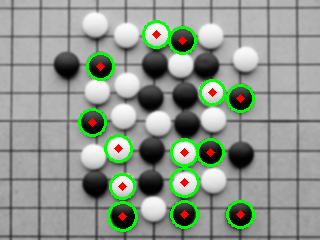

Canny inside HoughCircles


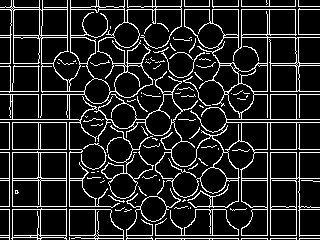

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('baduk1.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (5, 5), 0)
cimg = cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=20, param2=30, minRadius=0, maxRadius=15)
circles = np.uint16(np.around(circles)) # 반올림 처리

# 검출된 원을 이미지에 그리기
for i in circles[0,:]:
  cv2.circle(cimg, (i[0], i[1]), i[2], (0,255,0), 2)
  cv2.circle(cimg, (i[0], i[1]), 2, (0,0,255), 3)

print('HoughCircles'); cv2_imshow(cimg)
canny = cv2.Canny(blur, 25, 60)
print("Canny inside HoughCircles"); cv2_imshow(canny)

#연습 2: 신호 판별하기 (가장 밝은 원 찾기)

Circle 0 at (126,92), radius=8: mean value=123
Circle 1 at (146,90), radius=7: mean value=128
Circle 2 at (166,90), radius=8: mean value=207
Circles Detected


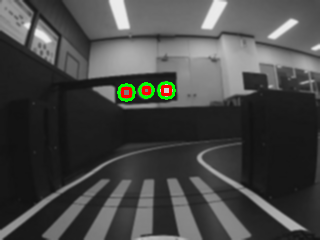

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread("traffic_sign.jpg",cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Make color image for check
cimg = cv2.cvtColor(blur,cv2.COLOR_GRAY2BGR)

# Apply Hough Circle Transform to detect circles
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT,
          1, 20, param1=40, param2=20, minRadius=1, maxRadius=10)

if circles is not None:
    # Sort the circles based on the x position of the center
    circles = np.round(circles[0, :]).astype("int")
    circles = sorted(circles, key=lambda circle: circle[0])

    # Extract small rectangle areas around the center of each circle,
    # calculate the mean value of each rectangle area
    for i, (x, y, r) in enumerate(circles):
        x1 = x - r // 2
        y1 = y - r // 2
        x2 = x + r // 2
        y2 = y + r // 2
        roi = img[y1:y2, x1:x2]
        mean_value = int(np.mean(roi))
        print(f"Circle {i} at ({x},{y}), radius={r}: mean value={mean_value}")

        # Draw the detected circles and rectangle areas on the original image
        cv2.circle(cimg, (x, y), r, (0, 255, 0), 2)
        cv2.rectangle(cimg, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
print('Circles Detected')
cv2_imshow(cimg)


# 허프변환기반 차선인식

이미지를 영상처리하여 허프변환 기반의 차선인식을 해보는 예제입니다.

original


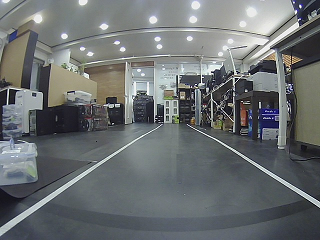

gray


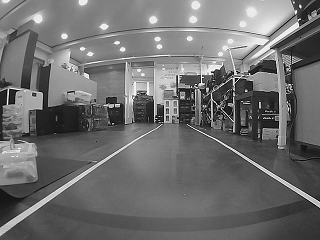

gaussian blur


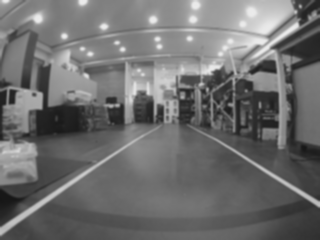

canny edge


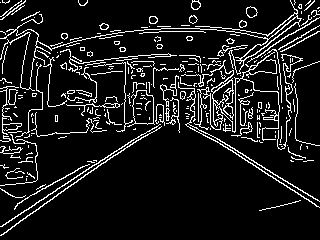

Number of lines : 40
found lines


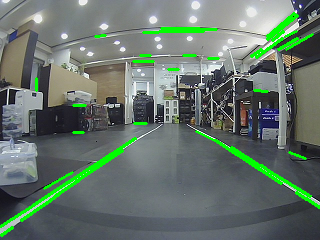

After ROI, number of lines : 10
roi area lines


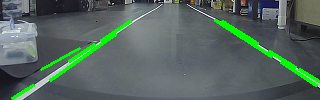

roi lines


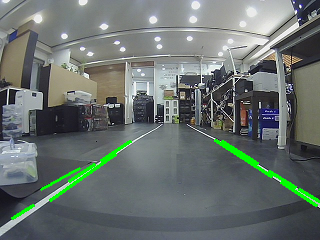

Number of lines after slope filtering : 10
Number of left lines : 5
Number of right lines : 5
left & right lines


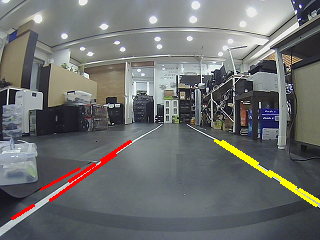

Left line & Right line


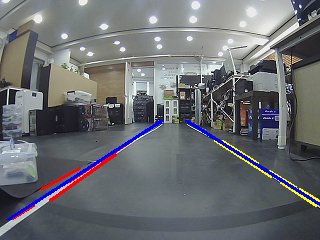

Left/Right Lane Positions : 84 265
Lane Midpoint : 174
Gap from the View_center : 14
Lanes positions


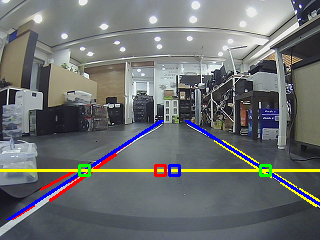

In [ ]:
#=============================================
# 함께 사용되는 각종 파이썬 패키지들의 import 선언부
#=============================================
import numpy as np
import cv2, math
from google.colab.patches import cv2_imshow

#=============================================
# 프로그램에서 사용할 변수, 저장공간 선언부
#=============================================
image = np.empty(shape=[0]) # 카메라 이미지를 담을 변수
Blue = (255,0,0) # 파란색
Green = (0,255,0) # 녹색
Red = (0,0,255) # 빨간색
Yellow = (0,255,255) # 노란색


#=============================================
# 차선 인식 프로그램에서 사용할 상수 선언부
#=============================================
CAM_FPS = 30  # 카메라 FPS 초당 30장의 사진을 보냄
WIDTH, HEIGHT = 320, 240  # 카메라 이미지 가로x세로 크기
ROI_START_ROW = 120  # 차선을 찾을 ROI 영역의 시작 Row값
ROI_END_ROW = 220  # 차선을 찾을 ROT 영역의 끝 Row값
ROI_HEIGHT = ROI_END_ROW - ROI_START_ROW  # ROI 영역의 세로 크기
L_ROW = 50  # 차선의 위치를 찾기 위한 ROI 안에서의 기준 Row값
View_Center = WIDTH//2

#=============================================
# 카메라 영상 이미지에서 차선을 찾는 코드
#=============================================
def lane_detect():

    global image
    prev_x_left = 0
    prev_x_right = WIDTH

    image = cv2.imread('line_pic1.png', cv2.IMREAD_COLOR)
    img = image.copy()
    display_img = img

    #=========================================
    # 원본 칼라이미지를 그레이 회색톤 이미지로 변환하고
    # 블러링 처리를 통해 노이즈를 제거한 후에 (약간 뿌옇게, 부드럽게)
    # Canny 변환을 통해 외곽선 이미지로 만들기
    #=========================================
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur_gray = cv2.GaussianBlur(gray,(5, 5), 0)
    edge_img = cv2.Canny(np.uint8(blur_gray), 60, 75)

    print("original")
    cv2_imshow(img)
    print("gray")
    cv2_imshow(gray)
    print("gaussian blur")
    cv2_imshow(blur_gray)
    print("canny edge")
    cv2_imshow(edge_img)
    cv2.waitKey()

    # 이미지에서 HoughLinesP 함수를 사용하여 선분들을 찾음
    all_lines = cv2.HoughLinesP(edge_img, 1, math.pi/180,30,30,10)

    if all_lines is None:
        # 직선이 없으면, False값과 0(왼쪽차선위치), 0(오른쪽차선위치) 반환
        return False, 0, 0

    print("Number of lines : %d" % len(all_lines))
    # print(all_lines)

    # 찾은 직선(선분0들을 녹색으로 이미지 위에 그려넣기
    line_draw_img = img.copy()
    for line in all_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_draw_img, (x1, y1), (x2, y2), Green, 2)

    print("found lines")
    cv2_imshow(line_draw_img)
    cv2.waitKey()
    cv2.destroyAllWindows()

    # img(원본이미지)의 특정영역(ROI Area)을 잘라내기
    roi_img = img[ROI_START_ROW:ROI_END_ROW, 0:WIDTH]
    line_draw_img = roi_img.copy()

    #=========================================
    # 원본 칼라이미지를 그레이 회색톤 이미지로 변환하고
    # 블러링 처리를 통해 노이즈를 제거한 후에 (약간 뿌옇게, 부드럽게)
    # Canny 변환을 통해 외곽선 이미지로 만들기
    #=========================================
    gray = cv2.cvtColor(roi_img, cv2.COLOR_BGR2GRAY)
    blur_gray = cv2.GaussianBlur(gray,(5, 5), 0)
    edge_img = cv2.Canny(np.uint8(blur_gray), 60, 75)

    # 잘라낸 이미지에서 HoughLinesP 함수를 사용하여 선분들을 찾음
    all_lines = cv2.HoughLinesP(edge_img, 1, math.pi/180,50,50,20)

    if all_lines is None:
        return False, 0, 0

    print("After ROI, number of lines : %d" % len(all_lines))

    # 찾은 선분들을 녹색으로 ROI 이미지 위에 그림
    for line in all_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_draw_img, (x1, y1), (x2, y2), Green, 2)

    print("roi area lines")
    cv2_imshow(line_draw_img)

    # ROI 이미지를 디버깅용 display_img에 overwrite해서 화면에 디스플레이 함
    display_img[ROI_START_ROW:ROI_END_ROW, 0:WIDTH] = line_draw_img
    print("roi lines")
    cv2_imshow(display_img)
    cv2.waitKey()

    #=========================================
    # 선분들의 기울기 값을 각각 모두 구한 후에 리스트에 담음.
    # 기울기의 절대값이 너무 작은 경우 (수평선에 가까운 경우)
    # 해당 선분을 빼고 담음.
    #=========================================
    slopes = []
    filtered_lines = []

    for line in all_lines:
        x1, y1, x2, y2 = line[0]

        if (x2 == x1):
            slope = 1000.0
        else:
            slope = float(y2-y1) / float(x2-x1)

        if 0.2 < abs(slope):
            slopes.append(slope)
            filtered_lines.append(line[0])

    print("Number of lines after slope filtering : %d" % len(filtered_lines))

    if len(filtered_lines) == 0:
        return False, 0, 0

    #=========================================
    # 왼쪽 차선에 해당하는 선분과 오른쪽 차선에 해당하는 선분을 구분하여
    # 각각 별도의 리스트에 담음.
    #=========================================
    left_lines = []
    right_lines = []

    for j in range(len(slopes)):
        Line = filtered_lines[j]
        slope = slopes[j]

        x1,y1, x2,y2 = Line

        # 기울기 값이 음수이고 화면의 왼쪽에 있으면 왼쪽 차선으로 분류함
        # 기준이 되는 X좌표값 = (화면중심값 - Margin값)
        Margin = 0

        if (slope < 0) and (x2 < WIDTH/2-Margin):
            left_lines.append(Line.tolist())

        # 기울기 값이 양수이고 화면의 오른쪽에 있으면 오른쪽 차선으로 분류함
        # 기준이 되는 X좌표값 = (화면중심값 + Margin값)
        elif (slope > 0) and (x1 > WIDTH/2+Margin):
            right_lines.append(Line.tolist())

    print("Number of left lines : %d" % len(left_lines))
    print("Number of right lines : %d" % len(right_lines))

    # 디버깅을 위해 차선과 관련된 직선과 선분을 그리기 위한 도화지 준비
    line_draw_img = roi_img.copy()

    # 왼쪽 차선에 해당하는 선분은 빨간색으로 표시
    for line in left_lines:
        x1,y1, x2,y2 = line
        cv2.line(line_draw_img, (x1,y1), (x2,y2), Red, 2)

    # 오른쪽 차선에 해당하는 선분은 노란색으로 표시
    for line in right_lines:
        x1,y1, x2,y2 = line
        cv2.line(line_draw_img, (x1,y1), (x2,y2), Yellow, 2)

    # show the results in origianl image
    display_img[ROI_START_ROW:ROI_END_ROW, 0:WIDTH] = line_draw_img
    print("left & right lines")
    cv2_imshow(display_img)
    cv2.waitKey()

    #=========================================
    # 왼쪽/오른쪽 차선에 해당하는 선분들의 데이터를 적절히 처리해서
    # 왼쪽차선의 대표직선과 오른쪽차선의 대표직선을 각각 구함.
    # 기울기와 Y절편값으로 표현되는 아래와 같은 직선의 방적식을 사용함.
    # (직선의 방정식) y = mx + b (m은 기울기, b는 Y절편)
    #=========================================

    # 왼쪽 차선을 표시하는 대표직선을 구함
    m_left, b_left = 0.0, 0.0
    x_sum, y_sum, m_sum = 0.0, 0.0, 0.0

    # 왼쪽 차선을 표시하는 선분들의 기울기와 양끝점들의 평균값을 찾아 대표직선을 구함
    size = len(left_lines)
    if size != 0:
        for line in left_lines:
            x1, y1, x2, y2 = line
            x_sum += x1 + x2
            y_sum += y1 + y2
            if(x2 != x1):
                m_sum += float(y2-y1)/float(x2-x1)
            else:
                m_sum += 0

        x_avg = x_sum / (size*2)
        y_avg = y_sum / (size*2)
        m_left = m_sum / size
        b_left = y_avg - m_left * x_avg

        if m_left != 0.0:
            #=========================================
            # (직선 #1) y = mx + b
            # (직선 #2) y = 0
            # 위 두 직선의 교점의 좌표값 (x1, 0)을 구함.
            x1 = int((0.0 - b_left) / m_left)

            #=========================================
            # (직선 #1) y = mx + b
            # (직선 #2) y = ROI_HEIGHT
            # 위 두 직선의 교점의 좌표값 (x2, ROI_HEIGHT)을 구함.
            x2 = int((ROI_HEIGHT - b_left) / m_left)

            # 두 교점, (x1,0)과 (x2, ROI_HEIGHT)를 잇는 선을 그림
            cv2.line(line_draw_img, (x1,0), (x2,ROI_HEIGHT), Blue, 2)

    # 오른쪽 차선을 표시하는 대표직선을 구함
    m_right, b_right = 0.0, 0.0
    x_sum, y_sum, m_sum = 0.0, 0.0, 0.0

    # 오른쪽 차선을 표시하는 선분들의 기울기와 양끝점들의 평균값을 찾아 대표직선을 구함
    size = len(right_lines)
    if size != 0:
        for line in right_lines:
            x1, y1, x2, y2 = line
            x_sum += x1 + x2
            y_sum += y1 + y2
            if(x2 != x1):
                m_sum += float(y2-y1)/float(x2-x1)
            else:
                m_sum += 0

        x_avg = x_sum / (size*2)
        y_avg = y_sum / (size*2)
        m_right = m_sum / size
        b_right = y_avg - m_right * x_avg

        if m_right != 0.0:
            #=========================================
            # (직선 #1) y = mx + b
            # (직선 #2) y = 0
            # 위 두 직선의 교점의 좌표값 (x1, 0)을 구함.
            x1 = int((0.0 - b_right) / m_right)

            #=========================================
            # (직선 #1) y = mx + b
            # (직선 #2) y = ROI_HEIGHT
            # 위 두 직선의 교점의 좌표값 (x2, ROI_HEIGHT)을 구함.
            x2 = int((ROI_HEIGHT - b_right) / m_right)

            # 두 교점, (x1,0)과 (x2, ROI_HEIGHT)를 잇는 선을 그림
            cv2.line(line_draw_img, (x1,0), (x2,ROI_HEIGHT), Blue, 2)

    # show the results in origianl image
    display_img[ROI_START_ROW:ROI_END_ROW, 0:WIDTH] = line_draw_img
    print("Left line & Right line")
    cv2_imshow(display_img)
    cv2.waitKey()

    #=========================================
    # 차선의 위치를 찾기 위한 기준선(수평선)은 아래와 같음.
    #   (직선의 방정식) y = L_ROW
    # 위에서 구한 2개의 대표직선,
    #   (직선의 방정식) y = (m_left)x + (b_left)
    #   (직선의 방정식) y = (m_right)x + (b_right)
    # 기준선(수평선)과 대표직선과의 교점인 x_left와 x_right를 찾음.
    #=========================================

    #=========================================
    # 대표직선의 기울기 값이 0.0이라는 것은 직선을 찾지 못했다는 의미임
    # 이 경우에는 교점 좌표값을 기존 저장해 놨던 값으로 세팅함
    #=========================================
    if m_left == 0.0:
        x_left = prev_x_left  # 변수에 저장해 놓았던 이전 값을 가져옴

    #=========================================
    # 아래 2개 직선의 교점을 구함
    # (직선의 방정식) y = L_ROW
    # (직선의 방정식) y = (m_left)x + (b_left)
    #=========================================
    else:
        x_left = int((L_ROW - b_left) / m_left)

    #=========================================
    # 대표직선의 기울기 값이 0.0이라는 것은 직선을 찾지 못했다는 의미임
    # 이 경우에는 교점 좌표값을 기존 저장해 놨던 값으로 세팅함
    #=========================================
    if m_right == 0.0:
        x_right = prev_x_right  # 변수에 저장해 놓았던 이전 값을 가져옴

    #=========================================
    # 아래 2개 직선의 교점을 구함
    # (직선의 방정식) y = L_ROW
    # (직선의 방정식) y = (m_right)x + (b_right)
    #=========================================
    else:
        x_right = int((L_ROW - b_right) / m_right)

    #=========================================
    # 대표직선의 기울기 값이 0.0이라는 것은 직선을 찾지 못했다는 의미임
    # 이 경우에 반대쪽 차선의 위치 정보를 이용해서 내 위치값을 정함
    #=========================================
    if m_left == 0.0 and m_right != 0.0:
        x_left = x_right - 380

    if m_left != 0.0 and m_right == 0.0:
        x_right = x_left + 380

    # 이번에 구한 값으로 예전 값을 업데이트 함
    prev_x_left = x_left
    prev_x_right = x_right

    # 왼쪽 차선의 위치와 오른쪽 차선의 위치의 중간 위치를 구함
    x_midpoint = (x_left + x_right) // 2

    print("Left/Right Lane Positions : %d %d" %(x_left, x_right))
    print("Lane Midpoint : %d" %(x_midpoint))
    print("Gap from the View_center : %d" %(x_midpoint - View_Center))

    #=========================================
    # 디버깅용 이미지 그리기
    # (1) 수평선 그리기 (직선의 방정식) y = L_ROW
    # (2) 수평선과 왼쪽 대표직선과의 교점 위치에 작은 녹색 사각형 그리기
    # (3) 수평선과 오른쪽 대표직선과의 교점 위치에 작은 녹색 사각형 그리기
    # (4) 왼쪽 교점과 오른쪽 교점의 중점 위치에 작은 파란색 사각형 그리기
    # (5) 화면의 중앙점 위치에 작은 빨간색 사각형 그리기
    #=========================================
    cv2.line(line_draw_img, (0,L_ROW), (WIDTH,L_ROW), Yellow, 2)
    cv2.rectangle(line_draw_img, (x_left-5,L_ROW-5), (x_left+5,L_ROW+5), Green, 2)
    cv2.rectangle(line_draw_img, (x_right-5,L_ROW-5), (x_right+5,L_ROW+5), Green, 2)
    cv2.rectangle(line_draw_img, (x_midpoint-5,L_ROW-5), (x_midpoint+5,L_ROW+5), Blue, 2)
    cv2.rectangle(line_draw_img, (View_Center-5,L_ROW-5), (View_Center+5,L_ROW+5), Red, 2)

    # 위 이미지를 디버깅용 display_img에 overwrite해서 화면에 디스플레이 함
    display_img[ROI_START_ROW:ROI_END_ROW, 0:WIDTH] = line_draw_img
    print("Lanes positions")
    cv2_imshow(display_img)
    cv2.waitKey()

    return True, x_left, x_right

#=============================================
# 실질적인 메인 함수
# 각종 영상처리와 알고리즘을 통해 차선의 위치를 파악
#=============================================
def start():

    found, x_left, x_right = lane_detect()

#=============================================
# 메인 함수
# 가장 먼저 호출되는 함수로 여기서 start() 함수를 호출함.
# start() 함수가 실질적인 메인 함수임.
#=============================================
if __name__ == '__main__':
    start()
